## Add Dense

In [1]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils

Using TensorFlow backend.


In [2]:
model = Sequential()
model.add(Dense(units=1000, input_dim=784, kernel_initializer='normal', activation='relu'))
model.add(Dense(units=10, kernel_initializer='normal', activation='softmax'))

In [3]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1000)              785000    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                10010     
Total params: 795,010
Trainable params: 795,010
Non-trainable params: 0
_________________________________________________________________
None


In [4]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [5]:
from keras.datasets import mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1] * x_train.shape[2]).astype('float32')
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1] * x_test.shape[2]).astype('float32')

In [6]:
x_train_normalize = x_train / 255
x_test_normalize = y_train / 255

In [7]:
from keras.utils import to_categorical
y_train_onehot = to_categorical(y_train)
y_test_onehot = to_categorical(y_test)

In [8]:
train_hisitory = model.fit(x=x_train_normalize, y=y_train_onehot, batch_size=100, epochs=20, verbose=1, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 8s 158us/step - loss: 0.2456 - acc: 0.9281 - val_loss: 0.1214 - val_acc: 0.9655
Epoch 2/20
48000/48000 [==============================] - 4s 76us/step - loss: 0.0931 - acc: 0.9726 - val_loss: 0.0924 - val_acc: 0.9717
Epoch 3/20
48000/48000 [==============================] - 4s 77us/step - loss: 0.0591 - acc: 0.9827 - val_loss: 0.0899 - val_acc: 0.9729
Epoch 4/20
48000/48000 [==============================] - 4s 76us/step - loss: 0.0381 - acc: 0.9885 - val_loss: 0.0793 - val_acc: 0.9753
Epoch 5/20
48000/48000 [==============================] - 4s 78us/step - loss: 0.0251 - acc: 0.9931 - val_loss: 0.0729 - val_acc: 0.9788
Epoch 6/20
48000/48000 [==============================] - 4s 78us/step - loss: 0.0170 - acc: 0.9958 - val_loss: 0.0783 - val_acc: 0.9763
Epoch 7/20
48000/48000 [==============================] - 4s 79us/step - loss: 0.0129 - acc: 0.9962 - val_loss: 0.0784 - val_ac

In [9]:
import matplotlib.pyplot as plt
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title("Train History")
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

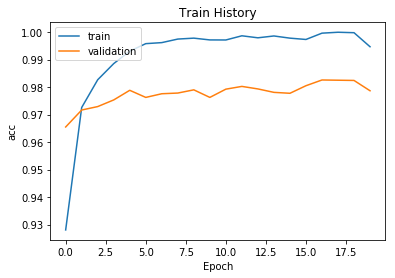

In [10]:
show_train_history(train_hisitory, 'acc', 'val_acc')

#### 我们发现校验集和训练集差距较大，出现过拟合的问题

In [11]:
scores = model.evaluate(x_test, y_test_onehot)
print('accuracy = ', scores[1])

10000/10000 [==============================] - 1s 61us/step
accuracy =  0.9811


#### 下面我们加入Dropout进行防止过拟合

In [12]:
from keras.layers import Dropout

In [13]:
model1 = Sequential()
model1.add(Dense(units=1000, input_dim=784, kernel_initializer='normal', activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(units=10, kernel_initializer='normal', activation='softmax'))

In [14]:
print(model1.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 1000)              785000    
_________________________________________________________________
dropout_1 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                10010     
Total params: 795,010
Trainable params: 795,010
Non-trainable params: 0
_________________________________________________________________
None


In [15]:
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model1_train_history = model1.fit(x=x_train_normalize, y=y_train_onehot, 
                                 batch_size=100, epochs=20, verbose=1, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 5s 106us/step - loss: 0.3094 - acc: 0.9069 - val_loss: 0.1397 - val_acc: 0.9603
Epoch 2/20
48000/48000 [==============================] - 4s 85us/step - loss: 0.1388 - acc: 0.9590 - val_loss: 0.1051 - val_acc: 0.9683
Epoch 3/20
48000/48000 [==============================] - 4s 84us/step - loss: 0.1012 - acc: 0.9703 - val_loss: 0.0862 - val_acc: 0.9748
Epoch 4/20
48000/48000 [==============================] - 4s 85us/step - loss: 0.0819 - acc: 0.9751 - val_loss: 0.0793 - val_acc: 0.9764
Epoch 5/20
48000/48000 [==============================] - 4s 81us/step - loss: 0.0689 - acc: 0.9781 - val_loss: 0.0769 - val_acc: 0.9758
Epoch 6/20
48000/48000 [==============================] - 4s 81us/step - loss: 0.0583 - acc: 0.9814 - val_loss: 0.0702 - val_acc: 0.9783
Epoch 7/20
48000/48000 [==============================] - 4s 83us/step - loss: 0.0505 - acc: 0.9842 - val_loss: 0.0720 - val_ac

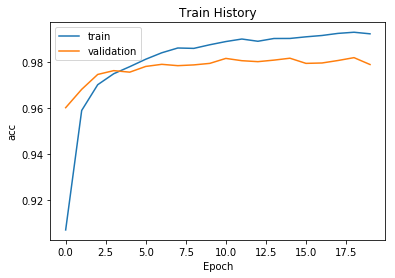

In [17]:
show_train_history(model1_train_history, 'acc', 'val_acc')

#### 我们发现过拟合现象已经减少了很多

In [18]:
scores = model1.evaluate(x_test, y_test_onehot)
print('accuracy = ', scores[1])

10000/10000 [==============================] - 1s 94us/step
accuracy =  0.9817
